# Step 1: Loading a Detection Dataset in FiftyOne

In our first step, we will be covering how you can load an object detection dataset into FiftyOne. Detection datasets usually come in a standard format that FiftyOne can load in one or two lines for you, making creating datasets fast and easy! However, not all datasets come in a known format and sometimes we have to add the detections on manually ourselves. With just a few more steps, FiftyOne still makes loading custom datasets easy.

Let’s take a look first at loading a common format.

## Loading a Common Format Detection Dataset

Detection datasets can come in many forms, but usually stick to a standard. For quick ingestion, FiftyOne is familiar with COCO, VOC, YOLO, KITTI, and FiftyOne formatted datasets. Check out each one to confirm the folder and file setup matches what your structure is. While uncommon, certain datasets tools will rename or move certain files, such as data.yaml in a YOLO dataset instead of dataset.yaml.

Data structure for coco format data must like this:
```
dataset_dir
|───data
|   |── 0001.jpg
|   └── ...
└───labels.json
```
data folder and labels.json must exist.

In [21]:
import fiftyone as fo

name = "solarpark-dataset"
dataset_dir = "../datasets/solarpark"

# Create the dataset
dataset = fo.Dataset.from_dir(
    dataset_dir=dataset_dir,
    dataset_type=fo.types.COCODetectionDataset, # Change with your type
    name=name,
)

# View summary info about the dataset
print(dataset)

# Print the first few samples in the dataset
print(dataset.head())

 100% |███████████████████| 16/16 [1.1s elapsed, 0s remaining, 14.9 samples/s]         
Name:        solarpark-dataset
Media type:  image
Num samples: 16
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    detections:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    segmentations:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
[<Sample: {
    'id': '68dce57d7a52fcd9c8583d0c',
    'media_type': 'image',
    'filepath': '/home/stan/projects/my_git_repo/Voxel51-AI-Pipeline/datasets/solarpark/data/DJI_2024042321

To solve the ValueError: Dataset name 'solarpark-dataset' is not available, if run code has error, the dataset name is not available anymore. 

In [20]:
print(fo.list_datasets())
fo.delete_dataset("solarpark-dataset")

['solarpark-dataset']


# Loading a Custom Format Detection Dataset

Sometimes datasets don’t come in a common format or maybe you are just adding some additional labels to an existing dataset. Adding detections to these datasets is still easy with FiftyOne. We will learn how to do this by looping over our datasets and adding a new label field to each sample.

In [23]:
!pip install kagglehub

In [25]:
import kagglehub
import fiftyone as fo

# Download dice dataset
path = kagglehub.dataset_download("nellbyler/d6-dice")

print("Path to dataset files:", path)

images_path = path + "/d6-dice/Images"
ann_path = path + "/d6-dice/Annotations"

name = "Dice Detection"

# Create the FiftyOne dataset
dataset = fo.Dataset.from_dir(
    dataset_dir=images_path,
    dataset_type=fo.types.ImageDirectory,
    name=name,
)

# View summary info about the dataset
print(dataset)

# Print the first few samples in the dataset
print(dataset.head())

100%|██████████| 29.1M/29.1M [00:02<00:00, 14.6MB/s]

Extracting files...


Path to dataset files: /home/stan/.cache/kagglehub/datasets/nellbyler/d6-dice/versions/3
 100% |█████████████████| 250/250 [33.6ms elapsed, 0s remaining, 7.4K samples/s]   
Name:        Dice Detection
Media type:  image
Num samples: 250
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
[<Sample: {
    'id': '68dce82f7a52fcd9c858420d',
    'media_type': 'image',
    'filepath': '/home/stan/.cache/kagglehub/datasets/nellbyler/d6-dice/versions/3/d6-dice/Images/IMG_20191208_111228.jpg',
    'tags': [],
    'metadata': None,
    'created_at': datetime.datetime(2025, 10, 1, 8, 37, 3,

We can see our images have loaded in the app but no annotations yet:


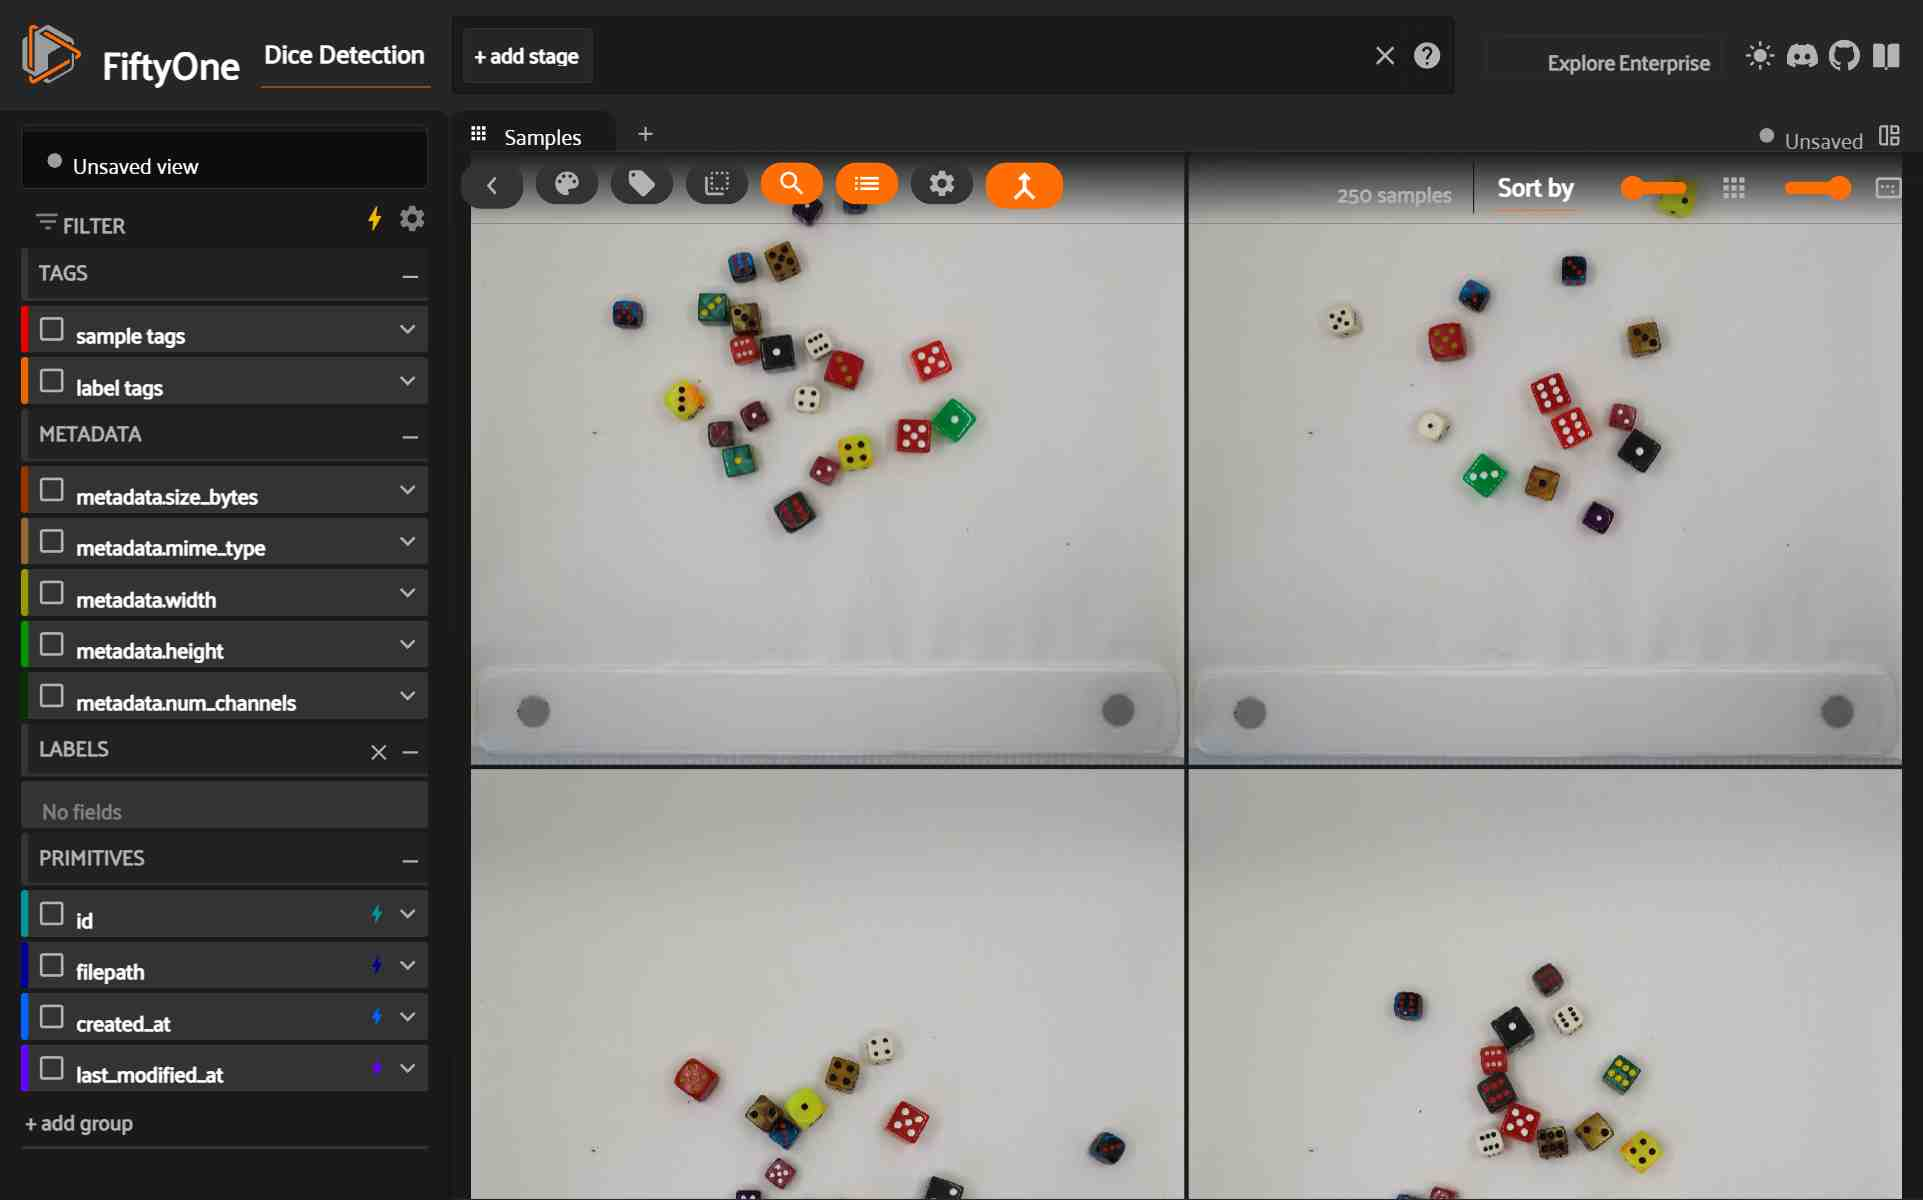


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 s

In [ ]:
session = fo.launch_app(dataset)

Now the annotations in the dataset are CUSTOM, with each image filepath having a corresponding label file in the Annotations folder like the following:
```
Images
 - IMG_000.jpg
 - IMG_001.jpg
 ...
Annotations
 - IMG_000.txt
 - IMG_001.txt
 ...
```

We can loop through our samples, grab the corresponding txt file for our sample, and load in the detections for each one. But first, we need to discuss how a FiftyOne Detection Label works!

The Detections class represents a list of object detections in an image. The detections are stored in the detections attribute of the Detections object.

Each individual object detection is represented by a Detection object. The string label of the object should be stored in the label attribute, and the bounding box for the object should be stored in the bounding_box attribute.

Lastly, bounding boxes in FiftyOne are always in the following format, normalized to be bounded by [0,1] relative to the image’s dimensions:
```
[<top-left-x>, <top-left-y>, <width>, <height>]
```

With that explained, let’s wrap up by adding detections to our dataset!

Our custom dice dataset has a custom annotation format that looks like:
```
class x_center y_center length width
```

On top of being in an incorrect bounding box format, the class is off by one for each dice since it starts at 0. So class 0 == side 1 on dice. Let’s look at how we can adjust our annotations and add to FiftyOne!

In [27]:
# Loop through for each sample in our dataset
for sample in dataset:
    # Load our annotation file into a list of detections
    sample_root = sample.filepath.split("/")[-1].split(".")[0]
    sample_ann_path = ann_path + "/" + sample_root + ".txt"

    with open(sample_ann_path, 'r') as file:
        list_of_anns = [line.strip().split() for line in file]

    # For each detection, adjust the format and add to our detections list
    detections = []

    for ann in list_of_anns:

        # Make sure to make adjustments to custom formats!
        # Move label up one
        label = str(int(ann[0]) + 1)

        # Adjust bounding box from x_center, y_center, length, width to top_left_x, top_left_y, width, height
        bbox = [float(x) for x in ann[1:]] # x,y,l,w
        bbox_adjusted = [bbox[0]-bbox[3]/2, bbox[1]-bbox[2]/2, bbox[3], bbox[2]] # x,y,w,h

        # Add the object to the sample
        det = fo.Detection(
            label=label, bounding_box=bbox_adjusted
        )

        detections.append(det)

    sample["ground_truth"] = fo.Detections(detections=detections)
    sample.save()

Once it is all done, we can view our dataset to confirm that we were able to load our custom detections!


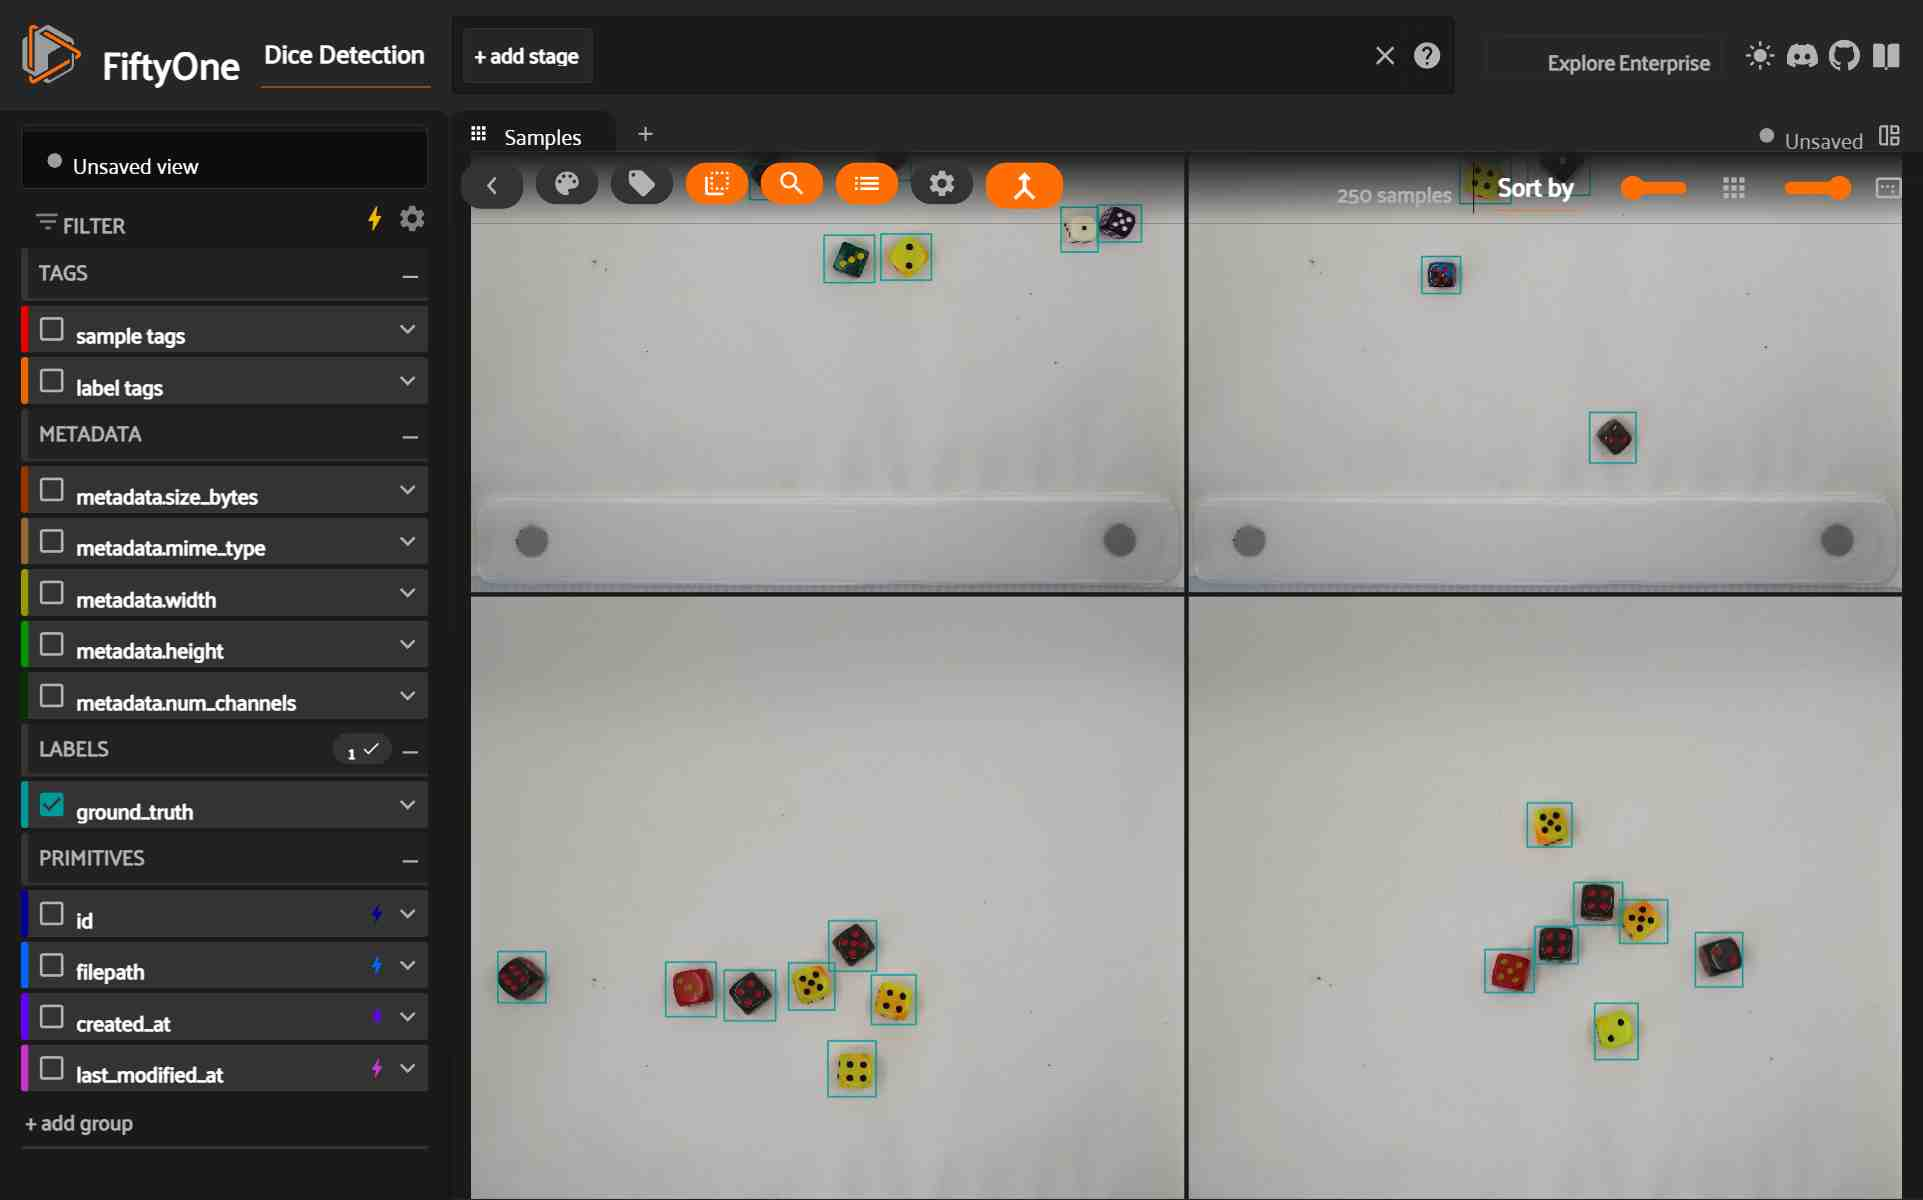

In [ ]:
session.show()

# Step 2: Adding Object Detections to a FiftyOne Dataset

In our first step, we will be covering how you can add object detections to your dataset. First we will go through how to add predictions using the FiftyOne Model Zoo and apply_model. In the second part, we will demonstrate how to add your detection predictions from your own custom model or labels. Feel free to skip ahead if you are interested in only adding object detections with your own model or labels!

## Using the Model Zoo

Let’s kick things off by loading in the MSCOCO 2017 validation split from the FiftyOne Dataset Zoo. We will cap it to a max of 1000 samples:

 100% |██████|    1.9Gb/1.9Gb [10.7s elapsed, 0s remaining, 193.2Mb/s]      
Extracting annotations to '/home/stan/fiftyone/coco-2017/raw/instances_val2017.json'
 100% |████████████████| 1000/1000 [20.6s elapsed, 0s remaining, 26.6 images/s]      
Writing annotations for 1000 downloaded samples to '/home/stan/fiftyone/coco-2017/validation/labels.json'
Dataset info written to '/home/stan/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'validation'
 100% |███████████████| 1000/1000 [2.5s elapsed, 0s remaining, 393.4 samples/s]      
Dataset 'coco-2017-validation-1000' created



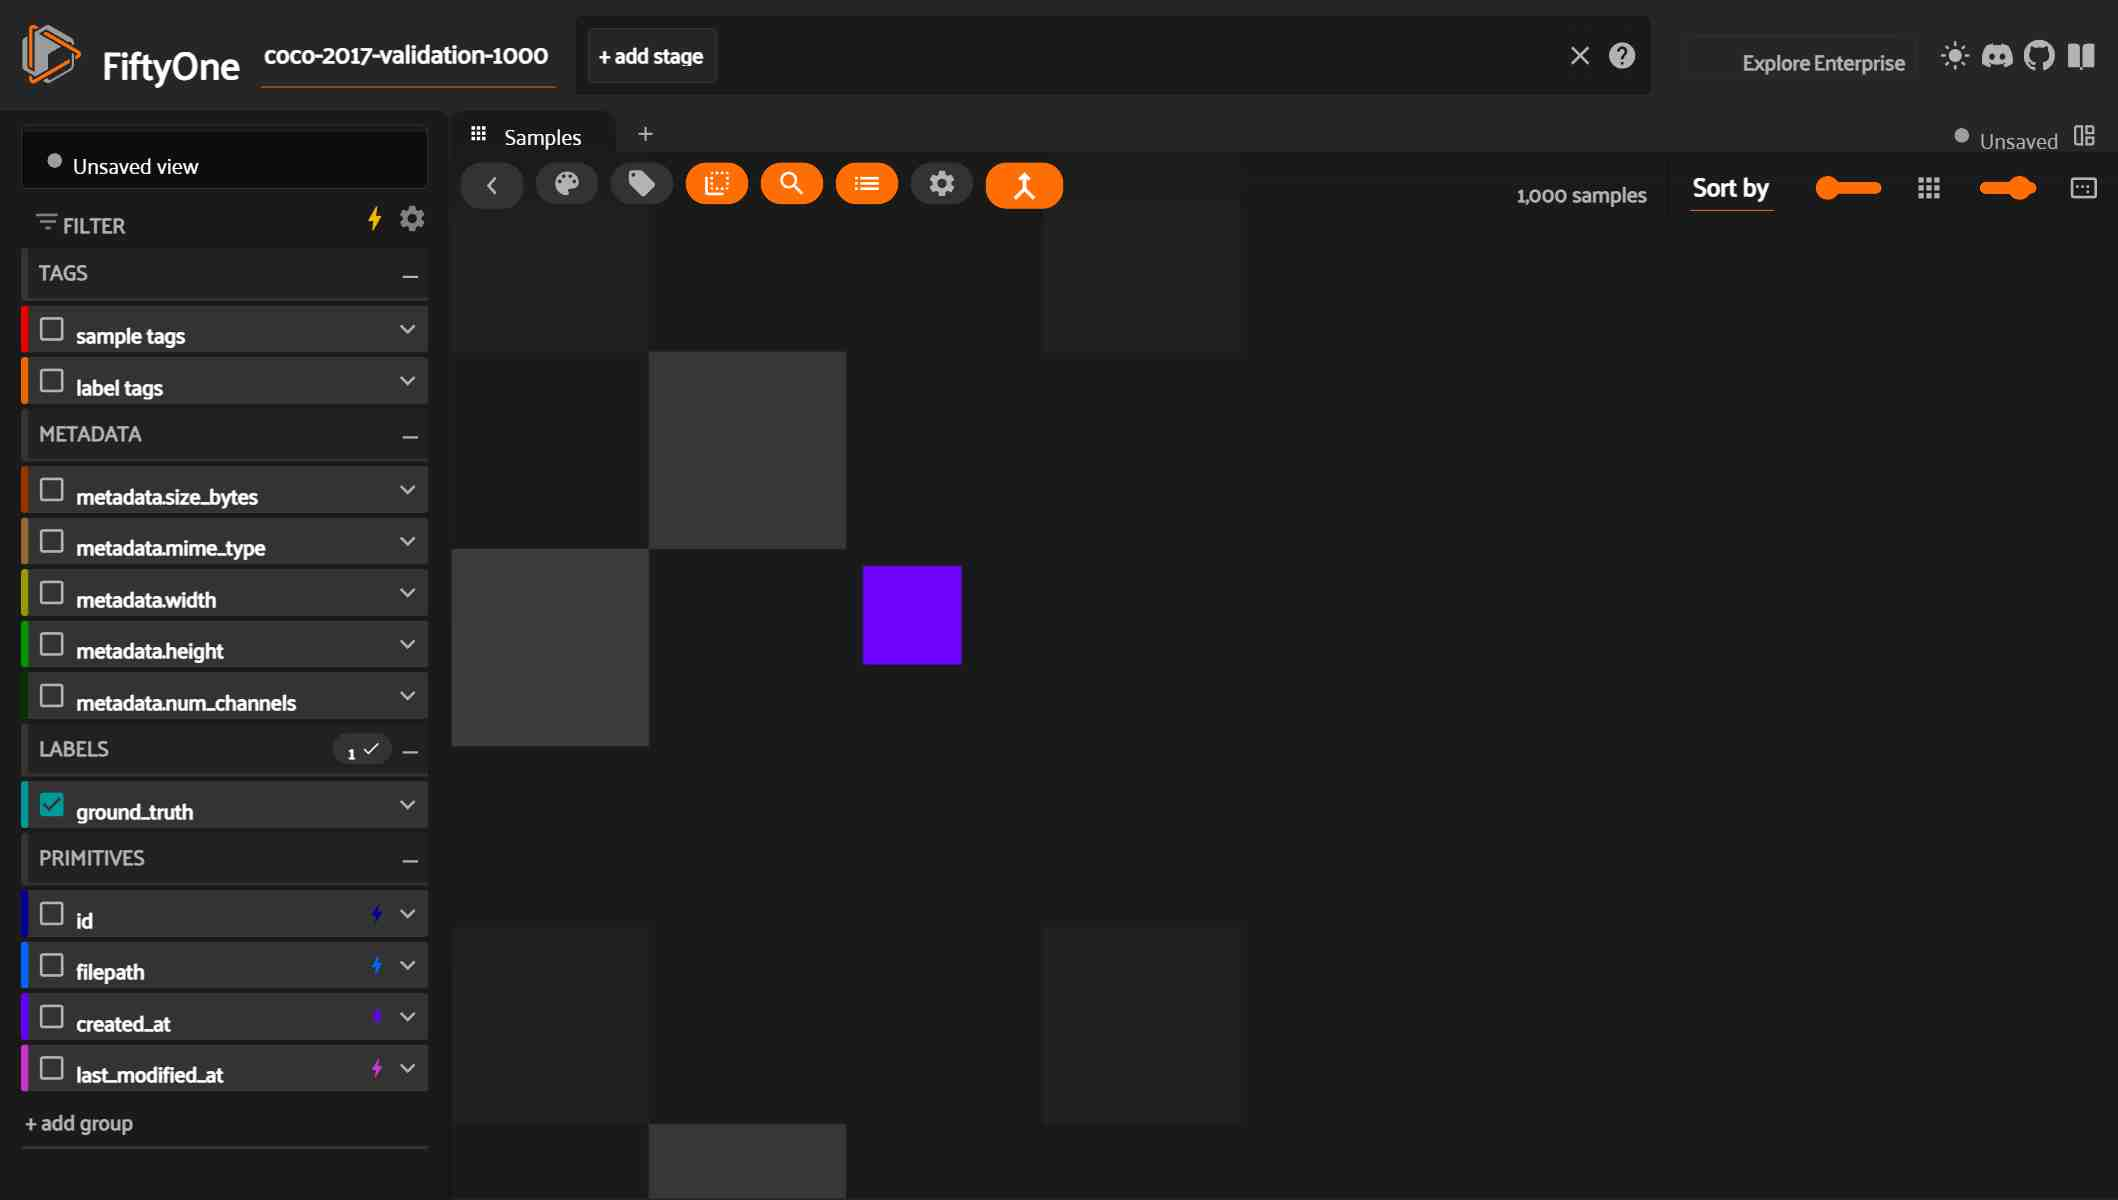


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 s

In [29]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("coco-2017", split="validation", max_samples=1000)

session = fo.launch_app(dataset)

With FiftyOne, you have tons of pretrained models at your disposal to use via the FiftyOne Model Zoo or using one of our integrations such as HuggingFace! To get started using them, first load the model in and pass it into the apply_model function.

We will use retinanet-resnet50-fpn-coco-torch from the model zoo first!

In [31]:
model = foz.load_zoo_model("retinanet-resnet50-fpn-coco-torch")
dataset.apply_model(model, label_field="zoo_predictions")

Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /home/stan/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


100%|██████████| 130M/130M [00:05<00:00, 22.9MB/s] 


 100% |███████████████| 1000/1000 [1.2m elapsed, 0s remaining, 13.4 samples/s]      


Let’s visualize our results!


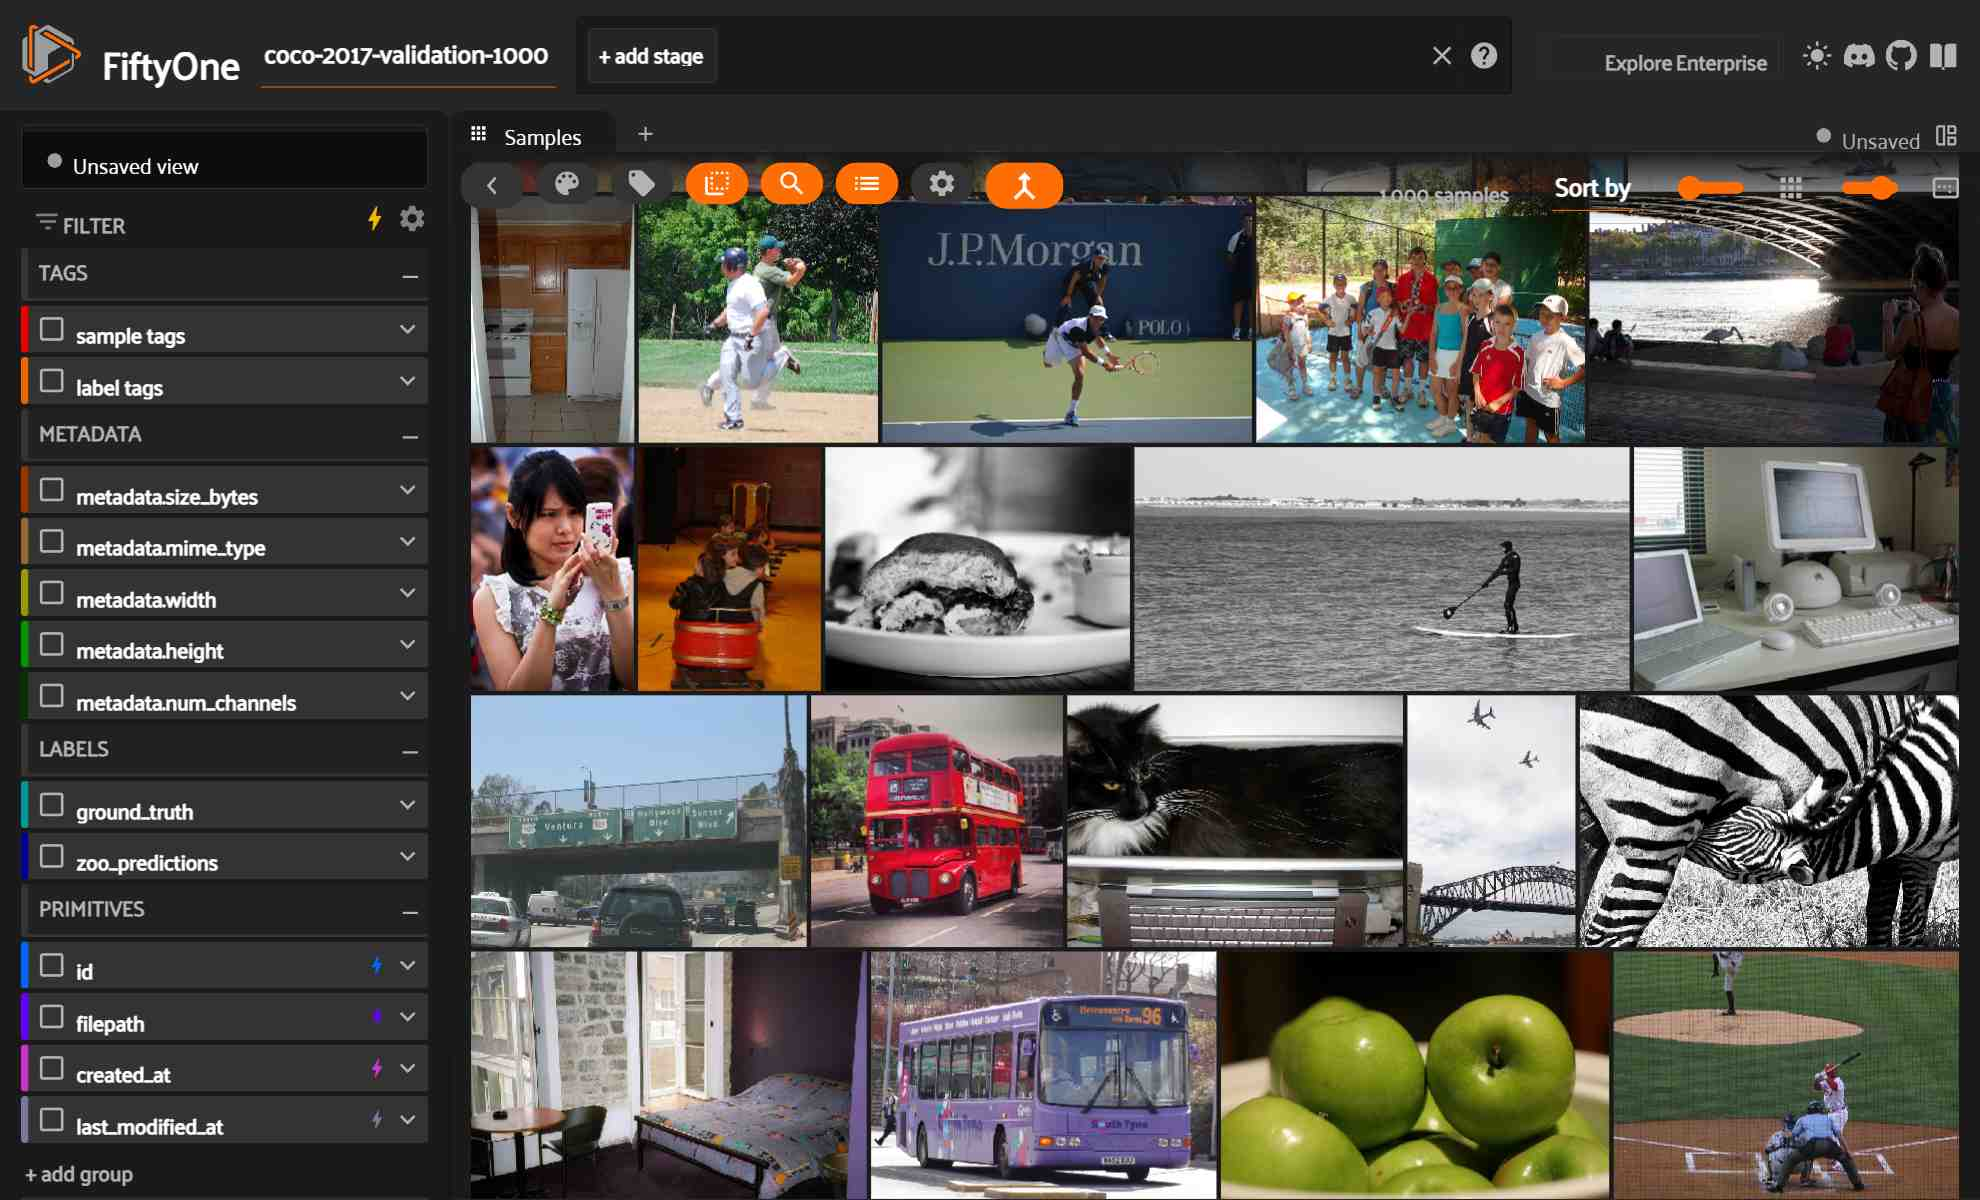

In [ ]:
session.show()

## Adding Predictions using Ultralytics

Thanks to FiftyOne’s integration with Ultralytics, we can pass any Ultralytics YOLO model into apply_model as well!

In [33]:
!pip install ultralytics

  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.7 MB/s eta 0:00:00
Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (67.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 23.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [ultralytics] [ultralytics]n]


Ultralytics creates cutting-edge, state-of-the-art (SOTA) YOLO models built on years of foundational research in computer vision and AI. Constantly updated for performance and flexibility, our models are fast, accurate, and easy to use. They excel at object detection, tracking, instance segmentation, image classification, and pose estimation tasks.

Find detailed documentation in the Ultralytics Docs. Get support via GitHub Issues. Join discussions on Discord, Reddit, and the Ultralytics Community Forums!

Request an Enterprise License for commercial use at Ultralytics Licensing.

In [34]:
from ultralytics import YOLO

# YOLOv8
model = YOLO("yolov8s.pt")

# model = YOLO("yolov8m.pt")
# model = YOLO("yolov8l.pt")
# model = YOLO("yolov8x.pt")

# YOLOv5
# model = YOLO("yolov5s.pt")
# model = YOLO("yolov5m.pt")
# model = YOLO("yolov5l.pt")
# model = YOLO("yolov5x.pt")

# YOLOv9
# model = YOLO("yolov9c.pt")
# model = YOLO("yolov9e.pt")
dataset.apply_model(model, label_field="YOLOv8")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/stan/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
 100% |███████████████| 1000/1000 [10.0s elapsed, 0s remaining, 114.3 samples/s]     


In [ ]:
session.show()

## Adding Predictions from Custom Model

When bringing your own model to add predictions to your dataset, you can add detection labels directly to each sample! The most important part to remember is that FiftyOne uses [nx, ny, nw, nh] bounding box format, or normalized x,y,w,h notation. This means that each value in the bounding box is between (0,1). Below is a sample function that converts an xyxy box to nxywh.

In [37]:
def convert_xyxy_boxes(sample, boxes):
    new_boxes = []

    for box in boxes:

        # Normalize X and Y by width and height
        nx = box[0] / sample.metadata.width
        ny = box[1] / sample.metadata.height

        # Calculate width and height and normalize as well
        nw = (box[2] - box[0]) / sample.metadata.width
        nh = (box[3] - box[1]) / sample.metadata.height
        new_box = [nx, ny, nw, nh]
        new_boxes.append(new_box)

    return new_boxes

For our custom model in this example, we will be using torchvision FasterRCNN_Resnet50. The pattern for adding custom labels looks like this:

    1.Load the sample image
    2.Perform any necessary preprocessing
    3.Inference on the image
    4.Grab the prediction and confidence of the model_output
    5.Adjust the bounding box if needed
    6.Add the values as a label to your sample

Let’s walkthrough them below!

In [39]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights

weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)

# Compute Metadata to collect each samples width and height
dataset.compute_metadata()

for sample in dataset:
    # Step 1: Load the image
    image = read_image(sample.filepath)

    # Step 2: Preform preprocessing
    preprocess = weights.transforms()

    batch = [preprocess(image)]

    # Step 3: Inference on the image
    model.eval()
    prediction = model(batch)[0]

    # Step 4: Grab the prediction and confidence
    labels = [weights.meta["categories"][i] for i in prediction["labels"]]
    confs = prediction["scores"].tolist()

    # Step 5: Convert the boxes to FiftyOne format
    fo_boxes = convert_xyxy_boxes(sample, prediction["boxes"].tolist())
    detections = []

    # Step 6: Add to your sample
    for cls, box, conf in zip(labels, fo_boxes, confs):

        det = fo.Detection(label=cls, bounding_box=box, confidence=conf)
        detections.append(det)

    sample["torchvision"] = fo.Detections(detections=detections)
    sample.save()

KeyboardInterrupt: 

Finally, we can see all of our results in the FiftyOne App!

In [41]:
session.show()

RuntimeError: Client is not connected